# 생선 분류 문제

생선의 종류를 분류하는 머신러닝 모델 훈련

사용할 알고리즘: **KNN(K-Nearest Neighbors)**
- 이 알고리즘은 주변에서 가장 가까운 5개(Default)의 데이터를 보고 **다수결의 원칙에 따라** 데이터를 예측한다.

[생선 데이터](http://www.kaggle.com/aungpyaeap/fish-market)

## 도미 데이터 준비하기

In [1]:
# 도미의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

print(f'How many breams? {len(bream_length)}')

How many breams? 35


### 도미 데이터 시각화

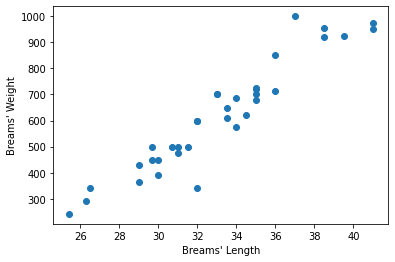

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel("Breams' Length")
plt.ylabel("Breams' Weight")
plt.show()

## 빙어 데이터 준비하기

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

print(f'How many smelts? {len(smelt_length)}')

How many smelts? 14


## 도미와 빙어 데이터 비교

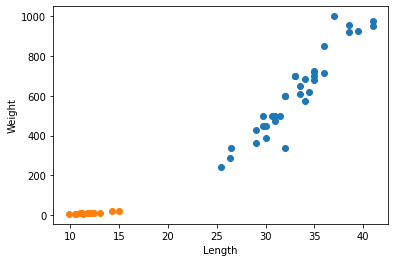

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

## K-Nearest Neighbors(KNN)

In [5]:
# 도미와 빙어 데이터를 하나의 데이터로 합침
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# scikit-learn을 사용하기 위해선 2차원 리스트 구조로 되어있어야 함
# 특성이 2개이므로 2개의 열을 가진 매트릭스 생성
fish_data = [[l, w] for l, w in zip(length, weight)]

# 정답 데이터를 알려줌
fish_target = [1] * 35 + [0] * 14

머신러닝에서 2개를 구분하는 경우 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓는다. 위의 예는 도미를 찾는 대상으로 정의했기 때문에 도미를 1로 놓고 빙어를 0으로 놓았다.

### KNeighborsClassifier 객체 생성

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 클래스의 객체를 만듦
kn = KNeighborsClassifier()

### 훈련 과정

In [7]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

### 모델 평가

In [8]:
kn.score(fish_data, fish_target)

1.0

1.0은 모든 데이터를 정확히 맞혔다는 것을 의미한다. 예를 들어 0.5라면 절반만 맞혔다는 의미이다. 이 값을 **정확도(accuracy)** 라고 부른다. 이 모델은 정확도가 100%이며 도미와 빙어를 완벽하게 분류했다.

### 새로운 데이터의 정답을 예측

In [9]:
kn.predict([[30, 600]])

array([1])

**KNN** 은 어떤 데이터에 대한 답을 구할 때 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다. 즉, 주위의 데이터로 현재 데이터를 판단하는 것이다.

새로운 데이터에 대해 예측할 때는 **가장 가까운 직선거리**에 어떤 데이터가 있는지를 살피기만 하면 된다. 

단점:
- 위의 특징 때문에 데이터가 아주 많은 경우 사용하기 어렵다. 
- 데이터가 크기 때문에 메로리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 필요하기 때문이다.

In [12]:
# # 우리가 전달한 모든 fish_data
# print(kn._fit_X)

# # 우리가 전달한 모든 fish_target
# print(kn._y)

KNN은 무엇인가 훈련되는 게 없다. `fit()` 메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 도미인지 빙어인지를 구분한다.

### 참고할 데이터가 default=5 가 아닌 49개라면

In [13]:
# 참고 데이터를 49개로 한 kn49 모델
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)      # 모델 훈련
kn49.score(fish_data, fish_target)    # 모델 평가

0.7142857142857143

In [14]:
print(35 / 49)

0.7142857142857143


KNN은 위에서 가장 가까운 데이터를 참고하여 도미인지 빙어인지를 구분하다고 했었는데, 그렇다면 가장 가까운 몇 개의 데이터를 참고할까? KNeighborsClassifier 클래스의 기본값은 5이다. 이 기준은 `n_neighbors` 매개변수로 바꿀 수 있다.

위의 예에서 `fish_data`의 데이터 49개 중에 도미가 35개로 다수를 차지하므로 어떤 데이터를 넣어도 무조건 도미로 예측할 것이다.

이 값은 결국 49마리 생선 중에 35마리의 도미의 개수를 나눈 값과 같다.

이 경우 점수가 1 미만으로 내려가기 때문에 `n_neighbors` 매개변수를 49로 두는 것은 좋지 않다. 기본값인 5로 하여 도미를 완벽하게 분류한 모델을 사용하는 것이 좋을 것이다.

## Note: 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수

In [15]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # KNN 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 시작지점의 이웃 및 개수 출력
    if score < 1:
        print(f'#{n}, Score: {score:.4f}')
        break

#18, Score: 0.9796
